In [8]:
%matplotlib inline

from __future__  import print_function, division

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/Train_KQyJ5eh.csv', parse_dates=['Date'])
test = pd.read_csv('../data/Test_HmLwURQ.csv', parse_dates=['Date'])
sub = pd.read_csv('../data/Sample_Submission_6FjDs3p.csv')

## What is a Time Series Data ?

* Sequence of measurements across time.
* Over a continuous time interval.
* Equally spacing between every two consecutive measurements.
* With each time unit within the time interval hvaing at most one data point.


## Properties of Time Series

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/SeasonalplotUS.png"/>
<p>Courtesy of Wikipedia</p>

** Seasonality **
>This pattern occurs when a series is influenced by seasonal factors. Seasonality is always of a fixed and of a known period.

<img src="http://www.es.lancs.ac.uk/cres/captain/airdata.jpg"/>
<p>http://www.es.lancs.ac.uk/cres/captain/dhrdemo.html</p>

** Trend **
> Trend exists when there is a long term increase or decrease in the data. It does not have to be linear. A trend can change direction and go from increasing to decreasing.

## Exploratory Data Analysis

In [3]:
# plot the data
train = train.set_index('Date', drop=False)

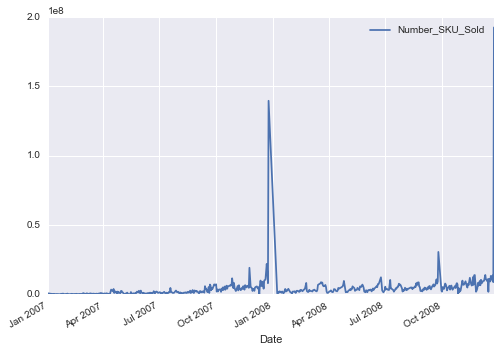

In [4]:
train[['Number_SKU_Sold']].plot();

** In order to better visualize the data, we can instead consider a log scale **

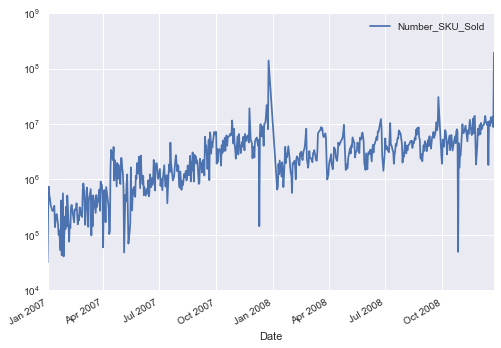

In [5]:
train[['Number_SKU_Sold']].plot(logy=True);

### Smoothing

>Smoothing is usually done to help us better see patterns, trends for example, in time series. For seasonal data, we might smooth out the seasonality so that we can identify the trend.  Smoothing doesn’t provide us with a model, but it can be a good first step in describing various components of the series.

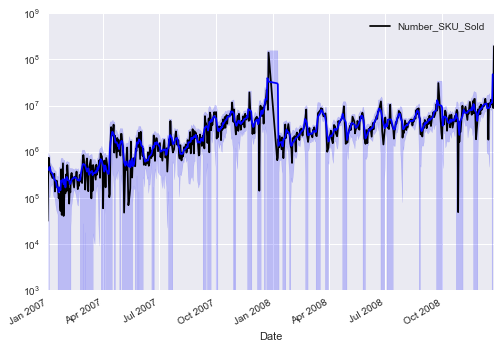

In [6]:
# consider mean
train_mean = pd.rolling_mean(train.Number_SKU_Sold, window=5, center=True)
train_std = pd.rolling_std(train.Number_SKU_Sold, window=5, center=True)

plt.figure()

train[['Number_SKU_Sold']].plot(c='k', logy=True)
train_mean.plot(logy=True, c='b')
plt.fill_between(train_std.index, train_mean-2*train_std, train_mean+2*train_std, color='b', alpha=0.2)
plt.yscale('log')
plt.show();

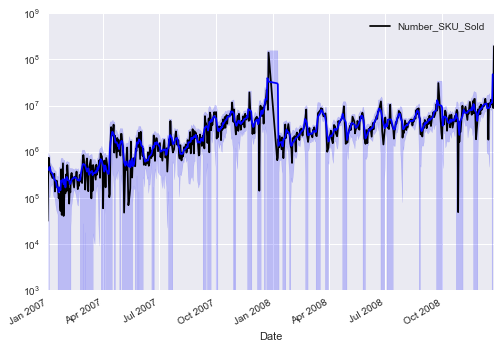

In [7]:
# consider median
train_median = pd.rolling_mean(train.Number_SKU_Sold, window=5, center=True)
train_std = pd.rolling_std(train.Number_SKU_Sold, window=5, center=True)

plt.figure()

train[['Number_SKU_Sold']].plot(c='k', logy=True)
train_median.plot(logy=True, c='b')
plt.fill_between(train_std.index, train_median-2*train_std, train_median+2*train_std, color='b', alpha=0.2)
plt.yscale('log')
plt.show();

## Autocorrelation

> Used to check for seasonality

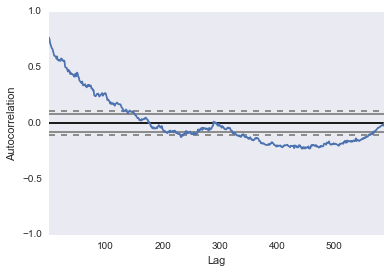

In [11]:
autocorrelation_plot(train.Number_SKU_Sold.map(np.log1p));